# FINAL PROJECT THICKET

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

print("done")

done


Read in all the files

# MPI Thicket Variables

In [140]:
mpi_random_tk = th.Thicket.from_caliperreader(glob("merge_ProjectOuts/mpi/random/*.cali"))
mpi_perturbed_tk = th.Thicket.from_caliperreader(glob("merge_ProjectOuts/mpi/perturbed/*.cali"))
mpi_sorted_tk = th.Thicket.from_caliperreader(glob("merge_ProjectOuts/mpi/sorted/*.cali"))
mpi_reverse_tk = th.Thicket.from_caliperreader(glob("merge_ProjectOuts/mpi/reverse/*.cali"))

# CUDA Thicket Variables

In [141]:
cuda_random_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/cuda/random/*.cali"))
cuda_perturbed_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/cuda/perturbed/*.cali"))
cuda_sorted_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/cuda/sorted/*.cali"))
cuda_reverse_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/cuda/reverse/*.cali"))

In [144]:
tks = {}

tks["mpi_sorted"] = mpi_sorted_tk
tks["mpi_reverse"] = mpi_reverse_tk
tks["mpi_random"] = mpi_random_tk
tks["mpi_perturbed"] = mpi_perturbed_tk

tks["cuda_sorted"] = cuda_sorted_tk
tks["cuda_reverse"] = cuda_reverse_tk
tks["cuda_random"] = cuda_random_tk
tks["cuda_perturbed"] = cuda_perturbed_tk


In [145]:
for i in tks.values():
    i.statsframe.dataframe["time"] = 1

print(tks["mpi_random"].tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  ├─ 1.000 MPI_Barrier
│  ├─ 1.000 comm_large
│  │  ├─ 1.000 MPI_Alltoallv
│  │  └─ 1.000 MPI_Gatherv
│  └─ 1.000 comm_small
│     ├─ 1.000 MPI_Allreduce
│     ├─ 1.000 MPI_Alltoall
│     ├─ 1.000 MPI_Bcast
│     └─ 1.000 MPI_Gather
├─ 1.000 comp
│  ├─ 1.000 comp_large
│  └─ 1.000 comp_small
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [146]:
# Performance data
tks["mpi_random"].dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              22361798      1   
                                                  116293393     1   
                                                  134818634     1   
                                                  146744629     1   
                                                  253356140     1   
                                                  580301485     1   
                                                  711363963     1   
                                                  796617537     1   
                                                  810973511     1   
                                                  941793176     1   
                                                  951418867     1   
                                                  1033541349    1   
                                                  1075687522    1   
                                                  1362906779    1   
                                                  1403911938    1   
                                                  1435201546    1   
                                                  1496506446    1   
                                                  1520814698    1   
                                                  1648651909    1   
                                                  1697589512    1   
                                                  1881801213    1   
                                                  1885136986    1   
                                                  2019179125    1   
                                                  2152020772    1   
                                                  2160855856    1   
                                                  2200215911    1   
                                                  2203361165    1   
                                                  2232519014    1   
                                                  2239690746    1   
                                                  2358279917    1   
                                                  2441435745    1   
                                                  2462135126    1   
                                                  2503756247    1   
                                                  2523424627    1   
                                                  2536232340    1   
                                                  2634403804    1   
                                                  2761994045    1   
                                                  2763097266    1   
                                                  2808852794    1   
                                                  2822370982    1   
                                                  2991430386    1   
                                                  3003539304    1   
                                                  3034853663    1   
                                                  3086508677    1   
                                                  3252180464    1   
                                                  3306545231    1   
                                                  3347448399    1   
                                                  3374329485    1   
                                                  3447244011    1   
                                                  3472221710    1   
                                                  3507915738    1   
                                                  3516945613    1   
                                                  3559501564    1   
                                                  3646086970    1   
                                                  3661965729    1   
                                                  3680149479    1   
                                                  3788723603

In [147]:
tks["cuda_random"].dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              53237954      1   
                                                  295152809     1   
                                                  462308784     1   
                                                  534694271     1   
                                                  932654057     1   
                                                  1100915270    1   
                                                  1181242029    1   
                                                  1189474035    1   
                                                  1199321333    1   
                                                  1207757055    1   
                                                  1454519365    1   
                                                  1594608727    1   
                                                  1673398063    1   
                                                  1747574591    1   
                                                  1858738155    1   
                                                  1971853665    1   
                                                  2098421615    1   
                                                  2163376222    1   
                                                  2345229792    1   
                                                  2404385596    1   
                                                  2723295400    1   
                                                  2763931446    1   
                                                  2905692805    1   
                                                  2961871404    1   
                                                  3038706806    1   
                                                  3109366213    1   
                                                  3208305979    1   
                                                  3444990064    1   
                                                  3502144840    1   
                                                  3660545698    1   
                                                  3751706338    1   
                                                  3774760877    1   
                                                  3942152025    1   
                                                  4188332717    1   
                                                  4262731561    1   
{'name': 'comm', 'type': 'function'}              53237954      3   
                                                  295152809     3   
                                                  462308784     3   
                                                  534694271     3   
                                                  932654057     3   
                                                  1100915270    3   
                                                  1181242029    3   
                                                  1189474035    3   
                                                  1199321333    3   
                                                  1207757055    3   
                                                  1454519365    3   
                                                  1594608727    3   
                                                  1673398063    3   
                                                  1747574591    3   
                                                  1858738155    3   
                                                  1971853665    3   
                                                  2098421615    3   
                                                  2163376222    3   
                                                  2345229792    3   
                                                  2404385596    3   
                                                  2723295400    3   
                                                  2763931446

In [148]:
tks["mpi_random"].metadata

cali.caliper.version  mpi.world.size  \
profile                                           
22361798             2.11.0-dev             128   
116293393            2.11.0-dev             512   
134818634            2.11.0-dev               8   
146744629            2.11.0-dev             128   
253356140            2.11.0-dev             512   
580301485            2.11.0-dev              64   
711363963            2.11.0-dev            1024   
796617537            2.11.0-dev               8   
810973511            2.11.0-dev              32   
941793176            2.11.0-dev               8   
951418867            2.11.0-dev             256   
1033541349           2.11.0-dev             128   
1075687522           2.11.0-dev             128   
1362906779           2.11.0-dev               4   
1403911938           2.11.0-dev            1024   
1435201546           2.11.0-dev              16   
1496506446           2.11.0-dev               4   
1520814698           2.11.0-dev             512   
1648651909           2.11.0-dev              32   
1697589512           2.11.0-dev             256   
1881801213           2.11.0-dev              16   
1885136986           2.11.0-dev             512   
2019179125           2.11.0-dev              16   
2152020772           2.11.0-dev              16   
2160855856           2.11.0-dev              32   
2200215911           2.11.0-dev              16   
2203361165           2.11.0-dev               2   
2232519014           2.11.0-dev               4   
2239690746           2.11.0-dev               8   
2358279917           2.11.0-dev             128   
2441435745           2.11.0-dev              64   
2462135126           2.11.0-dev            1024   
2503756247           2.11.0-dev               4   
2523424627           2.11.0-dev            1024   
2536232340           2.11.0-dev              64   
2634403804           2.11.0-dev             128   
2761994045           2.11.0-dev              16   
2763097266           2.11.0-dev             256   
2808852794           2.11.0-dev               8   
2822370982           2.11.0-dev              64   
2991430386           2.11.0-dev               8   
3003539304           2.11.0-dev               8   
3034853663           2.11.0-dev               2   
3086508677           2.11.0-dev               2   
3252180464           2.11.0-dev               2   
3306545231           2.11.0-dev            1024   
3347448399           2.11.0-dev             128   
3374329485           2.11.0-dev              64   
3447244011           2.11.0-dev              32   
3472221710           2.11.0-dev             256   
3507915738           2.11.0-dev               2   
3516945613           2.11.0-dev             256   
3559501564           2.11.0-dev              16   
3646086970           2.11.0-dev              64   
3661965729           2.11.0-dev              32   
3680149479           2.11.0-dev              32   
3788723603           2.11.0-dev             256   
3890394956           2.11.0-dev               4   
3893476762           2.11.0-dev               4   
3975596795           2.11.0-dev              32   
4036566109           2.11.0-dev               4   
4059388576           2.11.0-dev             512   
4114365992           2.11.0-dev              64   
4133963583           2.11.0-dev               2   
4259933312           2.11.0-dev               2   
4263644136           2.11.0-dev             512   
4284286604           2.11.0-dev             256   

                                                 spot.metrics  \
profile                                                         
22361798    min#inclusive#sum#time.duration,max#inclusive#...   
116293393   min#inclusive#sum#time.duration,max#inclusive#...   
134818634   min#inclusive#sum#time.duration,max#inclusive#...   
146744629   min#inclusive#sum#time.duration,max#inclusive#...   
253356140   min#inclusive#sum#time.duration,max#inclusive#...   
580301485   min#inclusive#sum#time.d

In [149]:
tks["cuda_random"].metadata

cali.caliper.version  \
profile                           
53237954             2.11.0-dev   
295152809            2.11.0-dev   
462308784            2.11.0-dev   
534694271            2.11.0-dev   
932654057            2.11.0-dev   
1100915270           2.11.0-dev   
1181242029           2.11.0-dev   
1189474035           2.11.0-dev   
1199321333           2.11.0-dev   
1207757055           2.11.0-dev   
1454519365           2.11.0-dev   
1594608727           2.11.0-dev   
1673398063           2.11.0-dev   
1747574591           2.11.0-dev   
1858738155           2.11.0-dev   
1971853665           2.11.0-dev   
2098421615           2.11.0-dev   
2163376222           2.11.0-dev   
2345229792           2.11.0-dev   
2404385596           2.11.0-dev   
2723295400           2.11.0-dev   
2763931446           2.11.0-dev   
2905692805           2.11.0-dev   
2961871404           2.11.0-dev   
3038706806           2.11.0-dev   
3109366213           2.11.0-dev   
3208305979           2.11.0-dev   
3444990064           2.11.0-dev   
3502144840           2.11.0-dev   
3660545698           2.11.0-dev   
3751706338           2.11.0-dev   
3774760877           2.11.0-dev   
3942152025           2.11.0-dev   
4188332717           2.11.0-dev   
4262731561           2.11.0-dev   

                                                 spot.metrics  \
profile                                                         
53237954    min#inclusive#sum#time.duration,max#inclusive#...   
295152809   min#inclusive#sum#time.duration,max#inclusive#...   
462308784   min#inclusive#sum#time.duration,max#inclusive#...   
534694271   min#inclusive#sum#time.duration,max#inclusive#...   
932654057   min#inclusive#sum#time.duration,max#inclusive#...   
1100915270  min#inclusive#sum#time.duration,max#inclusive#...   
1181242029  min#inclusive#sum#time.duration,max#inclusive#...   
1189474035  min#inclusive#sum#time.duration,max#inclusive#...   
1199321333  min#inclusive#sum#time.duration,max#inclusive#...   
1207757055  min#inclusive#sum#time.duration,max#inclusive#...   
1454519365  min#inclusive#sum#time.duration,max#inclusive#...   
1594608727  min#inclusive#sum#time.duration,max#inclusive#...   
1673398063  min#inclusive#sum#time.duration,max#inclusive#...   
1747574591  min#inclusive#sum#time.duration,max#inclusive#...   
1858738155  min#inclusive#sum#time.duration,max#inclusive#...   
1971853665  min#inclusive#sum#time.duration,max#inclusive#...   
2098421615  min#inclusive#sum#time.duration,max#inclusive#...   
2163376222  min#inclusive#sum#time.duration,max#inclusive#...   
2345229792  min#inclusive#sum#time.duration,max#inclusive#...   
2404385596  min#inclusive#sum#time.duration,max#inclusive#...   
2723295400  min#inclusive#sum#time.duration,max#inclusive#...   
2763931446  min#inclusive#sum#time.duration,max#inclusive#...   
2905692805  min#inclusive#sum#time.duration,max#inclusive#...   
2961871404  min#inclusive#sum#time.duration,max#inclusive#...   
3038706806  min#inclusive#sum#time.duration,max#inclusive#...   
3109366213  min#inclusive#sum#time.duration,max#inclusive#...   
3208305979  min#inclusive#sum#time.duration,max#inclusive#...   
3444990064  min#inclusive#sum#time.duration,max#inclusive#...   
3502144840  min#inclusive#sum#time.duration,max#inclusive#...   
3660545698  min#inclusive#sum#time.duration,max#inclusive#...   
3751706338  min#inclusive#sum#time.duration,max#inclusive#...   
3774760877  min#inclusive#sum#time.duration,max#inclusive#...   
3942152025  min#inclusive#sum#time.duration,max#inclusive#...   
4188332717  min#inclusive#sum#time.duration,max#inclusive#...   
4262731561  min#inclusive#sum#time.duration,max#inclusive#...   

           spot.timeseries.metrics  spot.format.version  \
profile                                                   
53237954                                              2   
295152809                                             2   
462308784                                             2   
534694271     

In [150]:
tks.keys()

dict_keys(['mpi_sorted', 'mpi_reverse', 'mpi_random', 'mpi_perturbed', 'cuda_sorted', 'cuda_reverse', 'cuda_random', 'cuda_perturbed'])

In [151]:
gbs = {}

for i in tks.keys():
    if "mpi" in i:
        gbs[i + "_strong"] = tks[i].groupby("InputSize")
        gbs[i + "_weak"] = tks[i].groupby("InputSize")
    else:
        gbs[i + "_strong"] = tks[i].groupby("InputSize")
        gbs[i + "_weak"] = tks[i].groupby("InputSize")


7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b15f2e234c0>, 262144: <thicket.thicket.Thicket object at 0x2b15f36b0c70>, 1048576: <thicket.thicket.Thicket object at 0x2b15f5b2d760>, 4194304: <thicket.thicket.Thicket object at 0x2b15f2ec7ac0>, 16777216: <thicket.thicket.Thicket object at 0x2b15f63cde20>, 67108864: <thicket.thicket.Thicket object at 0x2b15f26f14c0>, 268435456: <thicket.thicket.Thicket object at 0x2b15f30b8160>}
7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b15f39d6f10>, 262144: <thicket.thicket.Thicket object at 0x2b15f63d8040>, 1048576: <thicket.thicket.Thicket object at 0x2b15eb36b640>, 4194304: <thicket.thicket.Thicket object at 0x2b15f2d72340>, 16777216: <thicket.thicket.Thicket object at 0x2b15f475a520>, 67108864: <thicket.thicket.Thicket object at 0x2b15f2592220>, 268435456: <thicket.thicket.Thicket object at 0x2b15f28e9b20>}
7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b15ebfe3cd0>, 262144: <thic

Compose these 3 groups column-wise to get a holistic view of the data

In [152]:
print(gbs.keys())

dict_keys(['mpi_sorted_strong', 'mpi_sorted_weak', 'mpi_reverse_strong', 'mpi_reverse_weak', 'mpi_random_strong', 'mpi_random_weak', 'mpi_perturbed_strong', 'mpi_perturbed_weak', 'cuda_sorted_strong', 'cuda_sorted_weak', 'cuda_reverse_strong', 'cuda_reverse_weak', 'cuda_random_strong', 'cuda_random_weak', 'cuda_perturbed_strong', 'cuda_perturbed_weak'])


In [156]:
ctks = {}

for i in gbs.keys():
#     if "strong" in i:
    if "mpi" in i:
        ctks[i] = th.Thicket.concat_thickets(
            thickets=list(gbs[i].values()),
            headers=list(gbs[i].keys()),
            axis="columns",
            metadata_key="num_procs"
        )
    else:
        ctks[i] = th.Thicket.concat_thickets(
            thickets=list(gbs[i].values()),
            headers=list(gbs[i].keys()),
            axis="columns",
            metadata_key="num_threads"
        )
#     else:
#         ctks[i] = th.Thicket.concat_thickets(
#             thickets=list(gbs[i].values()),
#             headers=list(gbs[i].keys()),
#             axis="columns",
#             metadata_key="InputSize"
#         )

In [157]:
# mpi_strong_random_ctk.dataframe

ctks["mpi_random_strong"].dataframe

65536  \
                                                              nid   
node                                              num_procs         
{'name': 'main', 'type': 'function'}              2             1   
                                                  4             1   
                                                  8             1   
                                                  16            1   
                                                  32            1   
                                                  64            1   
                                                  128           1   
                                                  256           1   
                                                  512        <NA>   
                                                  1024       <NA>   
{'name': 'comm', 'type': 'function'}              2             3   
                                                  4             3   
                                                  8             3   
                                                  16            3   
                                                  32            3   
                                                  64            3   
                                                  128           3   
                                                  256           3   
                                                  512        <NA>   
                                                  1024       <NA>   
{'name': 'MPI_Barrier', 'type': 'function'}       2             4   
                                                  4             4   
                                                  8             4   
                                                  16            4   
                                                  32            4   
                                                  64            4   
                                                  128           4   
                                                  256           4   
                                                  512        <NA>   
                                                  1024       <NA>   
{'name': 'comm_large', 'type': 'function'}        2            13   
                                                  4            13   
                                                  8            13   
                                                  16           13   
                                                  32           13   
                                                  64           13   
                                                  128          13   
                                                  256          13   
                                                  512        <NA>   
                                                  1024       <NA>   
{'name': 'MPI_Alltoallv', 'type': 'function'}     2            14   
                                                  4            14   
                                                  8            14   
                                                  16           14   
                                                  32           14   
                                                  64           14   
                                                  128          14   
                                                  256          14   
                                                  512        <NA>   
                                                  1024       <NA>   
{'name': 'MPI_Gatherv', 'type': 'function'}       2            15   
                                                  4            15   
                                                  8            15   
                                                  16           15   
                                                  32           15   
                                                  64      

In [158]:
ctks["cuda_random_strong"].dataframe

32768  \
                                                                nid   
node                                              num_threads         
{'name': 'main', 'type': 'function'}              64              1   
                                                  128             1   
                                                  256             1   
                                                  512             1   
                                                  1024            1   
{'name': 'comm', 'type': 'function'}              64              3   
                                                  128             3   
                                                  256             3   
                                                  512             3   
                                                  1024            3   
{'name': 'comm_large', 'type': 'function'}        64              4   
                                                  128             4   
                                                  256             4   
                                                  512             4   
                                                  1024            4   
{'name': 'cudaMemcpy', 'type': 'function'}        64              5   
                                                  128             5   
                                                  256             5   
                                                  512             5   
                                                  1024            5   
{'name': 'comm_small', 'type': 'function'}        64              8   
                                                  128             8   
                                                  256             8   
                                                  512             8   
                                                  1024            8   
{'name': 'cudaMemcpy', 'type': 'function'}        64              9   
                                                  128             9   
                                                  256             9   
                                                  512             9   
                                                  1024            9   
{'name': 'comp', 'type': 'function'}              64              6   
                                                  128             6   
                                                  256             6   
                                                  512             6   
                                                  1024            6   
{'name': 'comp_large', 'type': 'function'}        64              7   
                                                  128             7   
                                                  256             7   
                                                  512             7   
                                                  1024            7   
{'name': 'comp_small', 'type': 'function'}        64             10   
                                                  128            10   
                                                  256            10   
                                                  512            10   
                                                  1024           10   
{'name': 'correctness_check', 'type': 'function'} 64             11   
                                                  128            11   
                                                  256            11   
                                                  512            11   
                                                  1024           11   
{'name': 'data_init', 'type': 'function'}         64              2   
                                                  128             2   
                                                  256             2   
                                                  512             2   
               

In [123]:
ctks["mpi_random_weak"].dataframe

65536  \
                                                              nid   
node                                              num_procs         
{'name': 'main', 'type': 'function'}              2             1   
                                                  4             1   
                                                  8             1   
                                                  16            1   
                                                  32            1   
                                                  64            1   
                                                  128           1   
                                                  256           1   
                                                  512        <NA>   
                                                  1024       <NA>   
{'name': 'comm', 'type': 'function'}              2             3   
                                                  4             3   
                                                  8             3   
                                                  16            3   
                                                  32            3   
                                                  64            3   
                                                  128           3   
                                                  256           3   
                                                  512        <NA>   
                                                  1024       <NA>   
{'name': 'MPI_Barrier', 'type': 'function'}       2             4   
                                                  4             4   
                                                  8             4   
                                                  16            4   
                                                  32            4   
                                                  64            4   
                                                  128           4   
                                                  256           4   
                                                  512        <NA>   
                                                  1024       <NA>   
{'name': 'comm_large', 'type': 'function'}        2            13   
                                                  4            13   
                                                  8            13   
                                                  16           13   
                                                  32           13   
                                                  64           13   
                                                  128          13   
                                                  256          13   
                                                  512        <NA>   
                                                  1024       <NA>   
{'name': 'MPI_Alltoallv', 'type': 'function'}     2            14   
                                                  4            14   
                                                  8            14   
                                                  16           14   
                                                  32           14   
                                                  64           14   
                                                  128          14   
                                                  256          14   
                                                  512        <NA>   
                                                  1024       <NA>   
{'name': 'MPI_Gatherv', 'type': 'function'}       2            15   
                                                  4            15   
                                                  8            15   
                                                  16           15   
                                                  32           15   
                                                  64      

Perform pandas operations to get the table in a desirable format for plotting

In [159]:
for i in ctks.keys():
    if "cuda" in i:
        for inputSize in [32768, 65536, 131072, 262144, 524288, 1048576, 2097152]:
            ctks[i].dataframe = ctks[i].dataframe.drop([(inputSize, "nid"), (inputSize, "spot.channel")], axis=1)
            
        ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", "")], axis=1)
        ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])
    else:
        for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
            ctks[i].dataframe = ctks[i].dataframe.drop([(inputSize, "nid"), (inputSize, "spot.channel")], axis=1)
            
        ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", "")], axis=1)
        ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])
   

In [160]:
ctks["mpi_sorted_strong"].dataframe

65536                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2              0.301731      0.302747      0.302239   
                  4              1.342491      1.343025      1.342847   
                  8              0.979378      0.980998      0.980529   
                  16             1.248135      1.251634      1.250110   
                  32             1.444485      1.454327      1.449019   
                  64             1.675640      1.681816      1.678411   
                  128            1.816234      1.839233      1.826481   
                  256            2.109040      2.147894      2.129480   
                  512                 NaN           NaN           NaN   
                  1024                NaN           NaN           NaN   
comm              2              0.008680      0.010531      0.009606   
                  4              0.013558      0.014769      0.014210   
                  8              0.026550      0.032322      0.028182   
                  16             0.038542      0.044259      0.040915   
                  32             0.052030      0.059237      0.054993   
                  64             0.024615      0.044888      0.034704   
                  128            0.036675      0.059633      0.047014   
                  256            0.048793      0.094924      0.073333   
                  512                 NaN           NaN           NaN   
                  1024                NaN           NaN           NaN   
MPI_Barrier       2              0.007973      0.009658      0.008816   
                  4              0.009149      0.010521      0.009845   
                  8              0.025501      0.031087      0.026957   
                  16             0.036592      0.042180      0.038949   
                  32             0.049601      0.056596      0.052436   
                  64             0.012331      0.029346      0.020828   
                  128            0.013900      0.035383      0.022930   
                  256            0.015319      0.064053      0.039412   
                  512                 NaN           NaN           NaN   
                  1024                NaN           NaN           NaN   
comm_large        2              0.000409      0.000561      0.000485   
                  4              0.001050      0.001553      0.001390   
                  8              0.000176      0.000404      0.000317   
                  16             0.000305      0.000630      0.000513   
                  32             0.001004      0.001374      0.001181   
                  64             0.001264      0.005447      0.003199   
                  128            0.001804      0.004831      0.003330   
                  256            0.002038      0.008723      0.007000   
                  512                 NaN           NaN           NaN   
                  1024                NaN           NaN           NaN   
MPI_Alltoallv     2              0.000139      0.000283      0.000211   
                  4              0.000981      0.001037      0.001013   
                  8              0.000112      0.000141      0.000132   
                  16             0.000146      0.000190      0.000176   
                  32             0.000681      0.000777      0.000740   
                  64             0.001010      0.001121      0.001057   
                  128            0.001280      0.001603      0.001432   
                  256            0.001658      0.002522      0.001925   
                  512                 NaN           NaN           NaN   
                  1024                NaN           NaN           NaN   
MPI_Gatherv       2              0.000252      0.000257      0.000254   
                  4              0.000045      0.000487      0.000350   
                  8  

In [161]:
ctks["cuda_sorted_strong"].dataframe

32768                              \
                              Min time/rank Max time/rank Avg time/rank   
name              num_threads                                             
main              64               0.418699      0.418699      0.418699   
                  128              0.396784      0.396784      0.396784   
                  256              0.392088      0.392088      0.392088   
                  512              0.433502      0.433502      0.433502   
                  1024             0.550978      0.550978      0.550978   
comm              64               0.001295      0.001295      0.001295   
                  128              0.000543      0.000543      0.000543   
                  256              0.000420      0.000420      0.000420   
                  512              0.000386      0.000386      0.000386   
                  1024             0.000418      0.000418      0.000418   
comm_large        64               0.000171      0.000171      0.000171   
                  128              0.000166      0.000166      0.000166   
                  256              0.000163      0.000163      0.000163   
                  512              0.000157      0.000157      0.000157   
                  1024             0.000170      0.000170      0.000170   
cudaMemcpy        64               0.000139      0.000139      0.000139   
                  128              0.000132      0.000132      0.000132   
                  256              0.000134      0.000134      0.000134   
                  512              0.000127      0.000127      0.000127   
                  1024             0.000137      0.000137      0.000137   
comm_small        64               0.001013      0.001013      0.001013   
                  128              0.000270      0.000270      0.000270   
                  256              0.000159      0.000159      0.000159   
                  512              0.000132      0.000132      0.000132   
                  1024             0.000141      0.000141      0.000141   
cudaMemcpy        64               0.000957      0.000957      0.000957   
                  128              0.000221      0.000221      0.000221   
                  256              0.000118      0.000118      0.000118   
                  512              0.000090      0.000090      0.000090   
                  1024             0.000094      0.000094      0.000094   
comp              64               0.002688      0.002688      0.002688   
                  128              0.001073      0.001073      0.001073   
                  256              0.000883      0.000883      0.000883   
                  512              0.000353      0.000353      0.000353   
                  1024             0.000267      0.000267      0.000267   
comp_large        64               0.000150      0.000150      0.000150   
                  128              0.000140      0.000140      0.000140   
                  256              0.000118      0.000118      0.000118   
                  512              0.000117      0.000117      0.000117   
                  1024             0.000140      0.000140      0.000140   
comp_small        64               0.002453      0.002453      0.002453   
                  128              0.000858      0.000858      0.000858   
                  256              0.000702      0.000702      0.000702   
                  512              0.000171      0.000171      0.000171   
                  1024             0.000053      0.000053      0.000053   
correctness_check 64               0.000112      0.000112      0.000112   
                  128              0.000112      0.000112      0.000112   
                  256              0.000113      0.000113      0.000113   
                  512              0.000112      0.000112      0.000112   
                  1024             0.000121      0.000121      0.000121   
data_init         64               0.000128      0.000128      

In [126]:
ctks["mpi_random_weak"].dataframe

65536                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2              0.304246      0.305070      0.304658   
                  4              0.344680      0.346162      0.345647   
                  8              0.787983      0.792235      0.789356   
                  16             0.657233      0.662021      0.660444   
                  32             1.424580      1.433104      1.428682   
                  64             1.643303      1.904606      1.771251   
                  128            1.495822      1.508891      1.502015   
                  256            1.868637      1.888371      1.878982   
                  512                 NaN           NaN           NaN   
                  1024                NaN           NaN           NaN   
comm              2              0.006319      0.007918      0.007118   
                  4              0.008238      0.009934      0.009153   
                  8              0.016390      0.019169      0.017054   
                  16             0.023239      0.025667      0.024216   
                  32             0.058256      0.066366      0.063213   
                  64             0.018751      0.036968      0.028860   
                  128            0.026959      0.048743      0.035012   
                  256            0.045839      0.203677      0.158113   
                  512                 NaN           NaN           NaN   
                  1024                NaN           NaN           NaN   
MPI_Barrier       2              0.005571      0.007041      0.006306   
                  4              0.007446      0.009429      0.008490   
                  8              0.014438      0.017431      0.015137   
                  16             0.021012      0.023386      0.021867   
                  32             0.054576      0.062684      0.059712   
                  64             0.001703      0.016446      0.010207   
                  128            0.001861      0.024384      0.011566   
                  256            0.009267      0.165267      0.120756   
                  512                 NaN           NaN           NaN   
                  1024                NaN           NaN           NaN   
comm_large        2              0.000420      0.000532      0.000476   
                  4              0.000177      0.000456      0.000340   
                  8              0.000203      0.000491      0.000376   
                  16             0.000374      0.000688      0.000549   
                  32             0.000787      0.001124      0.000954   
                  64             0.002733      0.009558      0.006251   
                  128            0.003035      0.010904      0.008635   
                  256            0.001745      0.013900      0.012365   
                  512                 NaN           NaN           NaN   
                  1024                NaN           NaN           NaN   
MPI_Alltoallv     2              0.000142      0.000244      0.000193   
                  4              0.000124      0.000192      0.000155   
                  8              0.000122      0.000162      0.000149   
                  16             0.000226      0.000304      0.000279   
                  32             0.000509      0.000579      0.000541   
                  64             0.002369      0.004214      0.003608   
                  128            0.002676      0.006223      0.006041   
                  256            0.001338      0.007638      0.007238   
                  512                 NaN           NaN           NaN   
                  1024                NaN           NaN           NaN   
MPI_Gatherv       2              0.000259      0.000266      0.000263   
                  4              0.000033      0.000244      0.000165   
                  8  

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [162]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [163]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

In [164]:
ctks["mpi_random_strong"].dataframe.loc["main"][262144]

Min time/rank  Max time/rank  Avg time/rank   Total time  \
num_procs                                                             
2               0.329483       0.330581       0.330032     0.660063   
4               0.490914       0.496598       0.493044     1.972178   
8               0.799785       0.807662       0.804979     6.439832   
16              0.656338       0.660717       0.658608    10.537731   
32              1.431100       1.440347       1.435205    45.926544   
64              1.370681       1.386167       1.377728    88.174613   
128             1.585454       1.608739       1.595120   204.175372   
256             1.858605       1.908185       1.885634   482.722228   
512             2.545665       2.603312       2.576150  1318.988894   
1024                 NaN            NaN            NaN          NaN   

           Variance time/rank  
num_procs                      
2                    0.000000  
4                    0.000005  
8                    0.000008  
16                   0.000001  
32                   0.000008  
64                   0.000012  
128                  0.000020  
256                  0.000130  
512                  0.000141  
1024                      NaN

In [165]:
ctks["mpi_random_strong"].dataframe.loc["main"][(268435456, "Avg time/rank")]

num_procs
2       74.114080
4       37.653831
8       20.835303
16      11.272413
32       7.202527
64       4.516199
128      3.302078
256      3.677643
512      3.329157
1024     5.517051
Name: (268435456, Avg time/rank), dtype: float64

In [166]:
# function_names = ("main", "comp", "comm", "comm_small", "comm_large", "comp_small", "comp_large")
function_names = ("main", "comm", "comp_large")
# function_names = set(ctks["mpi_strong_perturbed"].dataframe.index.get_level_values("name"))

In [167]:
ctks.keys()

dict_keys(['mpi_sorted_strong', 'mpi_sorted_weak', 'mpi_reverse_strong', 'mpi_reverse_weak', 'mpi_random_strong', 'mpi_random_weak', 'mpi_perturbed_strong', 'mpi_perturbed_weak', 'cuda_sorted_strong', 'cuda_sorted_weak', 'cuda_reverse_strong', 'cuda_reverse_weak', 'cuda_random_strong', 'cuda_random_weak', 'cuda_perturbed_strong', 'cuda_perturbed_weak'])

In [169]:
masterDF = pd.DataFrame()

for inputType in ctks.keys():
    if("strong" in inputType and "mpi" in inputType):
        tempDF = ctks[inputType].dataframe.loc["main"][(16777216, "Avg time/rank")]
        tempDF = tempDF.rename(inputType.split('_')[1])    
        masterDF = pd.concat([masterDF, tempDF], axis=1) 

masterDF

sorted   reverse    random  perturbed
2     2.047217  2.176011  4.380731   2.232806
4     2.039920  1.449889  2.487157   1.416467
8     0.850118  1.186207  2.681238   1.109158
16    1.410071  0.889490  1.763048   1.517758
32    1.518640  1.746918  1.755102   1.882661
64    1.734911  1.538666  1.946614   1.469559
128   1.532933  1.970025  1.681162   1.557213
256   1.779906  1.875567  1.822231   1.897575
512   2.810104  3.080611  2.287960   2.507405
1024  4.402076  4.427607  4.569657   3.373162

In [170]:
masterDF = pd.DataFrame()

for inputType in ctks.keys():
    if("strong" in inputType and "cuda" in inputType):
        tempDF = ctks[inputType].dataframe.loc["main"][(65536, "Avg time/rank")]
        tempDF = tempDF.rename(inputType.split('_')[1])    
        masterDF = pd.concat([masterDF, tempDF], axis=1) 

masterDF

sorted   reverse    random  perturbed
64    0.537307  0.476963  0.477167   0.526224
128   0.473075  0.506319  0.415928   0.499337
256   0.453382  0.448076  0.413557   0.466571
512   0.468375  0.513514  0.488915   0.449593
1024  0.542293  0.663431  0.654608   0.556163

In [135]:
masterDF = pd.DataFrame()

for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
    tempDF = ctks["mpi_random_weak"].dataframe.loc["main"][(inputSize, "Avg time/rank")]
    tempDF = tempDF.rename(inputSize)    
    masterDF = pd.concat([masterDF, tempDF], axis=1) 

masterDF

65536      262144     1048576    4194304    16777216   67108864   \
2      0.304658   0.330032   0.511847   1.266743   4.380731  17.890431   
4      0.345647   0.493044   0.509579   0.865556   2.487157   9.450240   
8      0.789356   0.804979   0.802548   1.863977   2.681238   6.273413   
16     0.660444   0.658608   0.685509   1.349376   1.763048   3.715695   
32     1.428682   1.435205   1.403243   1.489771   1.755102   2.646311   
64     1.771251   1.377728   1.414122   1.423641   1.946614   2.160047   
128    1.502015   1.595120   1.481819   1.516729   1.681162   1.927261   
256    1.878982   1.885634   1.730530   1.713524   1.822231   2.007919   
512         NaN   2.576150   2.302914   2.319644   2.287960   2.579658   
1024        NaN        NaN   4.447840   4.332897   4.569657   3.601546   

      268435456  
2     74.114080  
4     37.653831  
8     20.835303  
16    11.272413  
32     7.202527  
64     4.516199  
128    3.302078  
256    3.677643  
512    3.329157  
1024   5.517051

# MPI STRONG SCALING TIME PLOTS

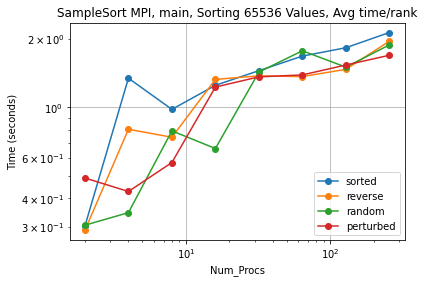

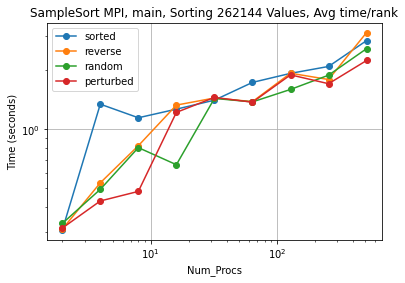

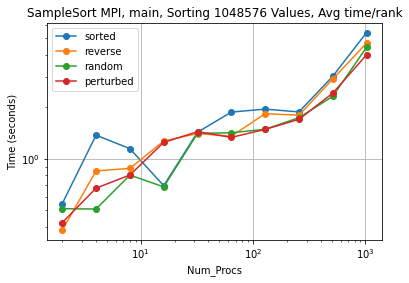

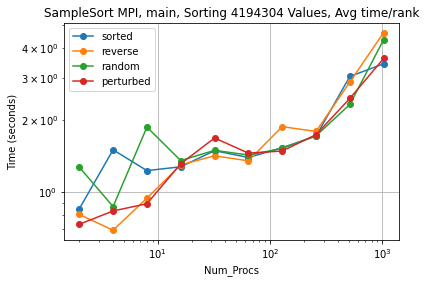

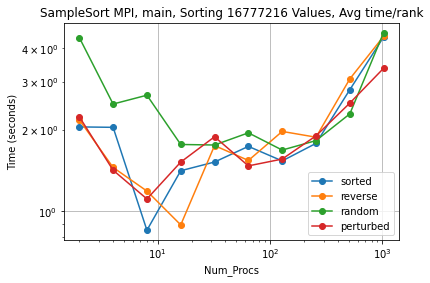

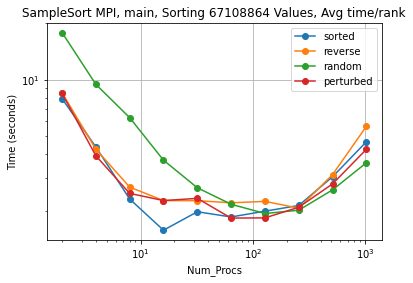

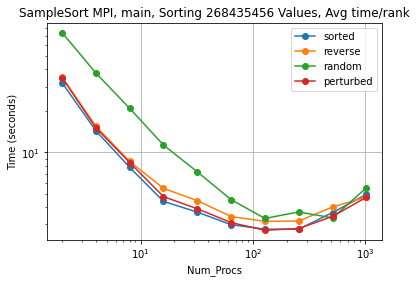

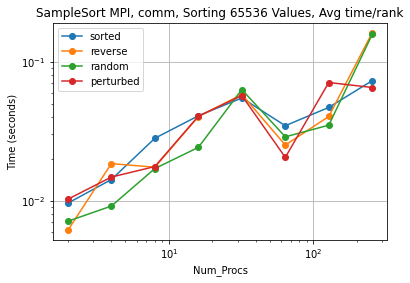

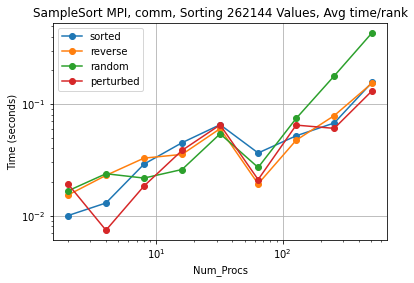

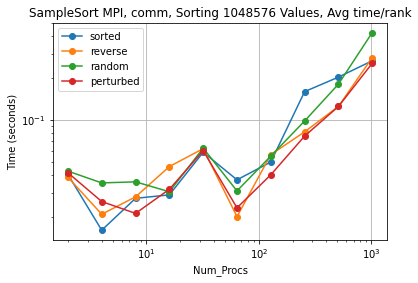

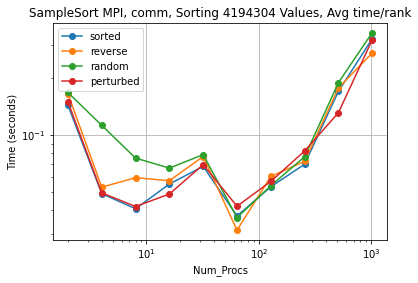

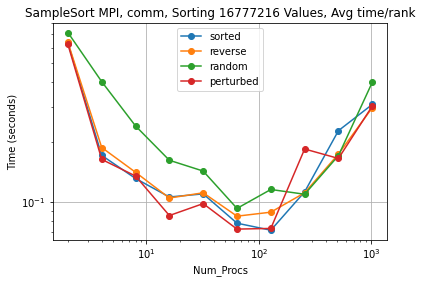

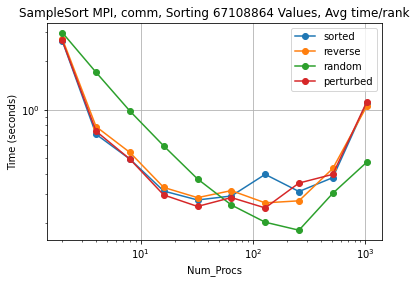

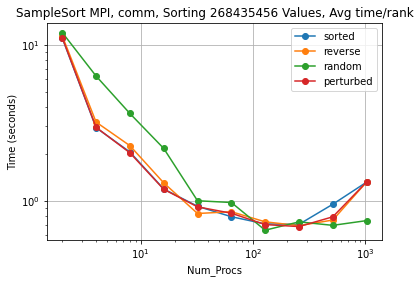

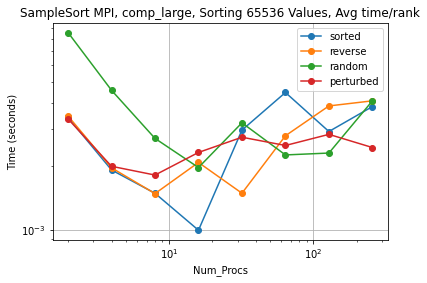

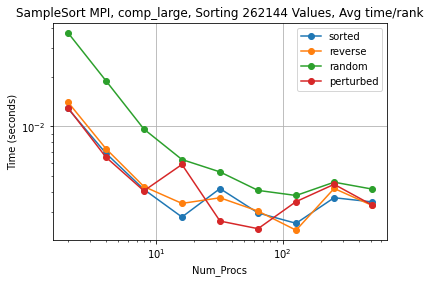

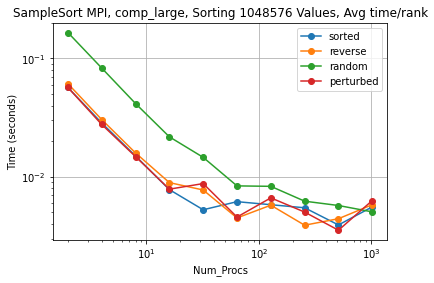

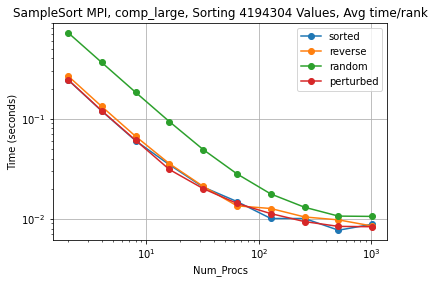

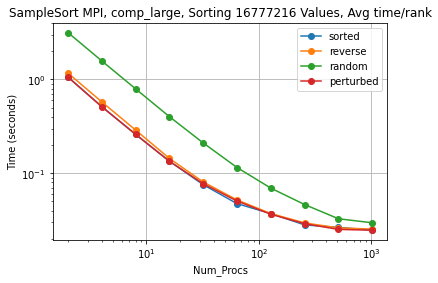

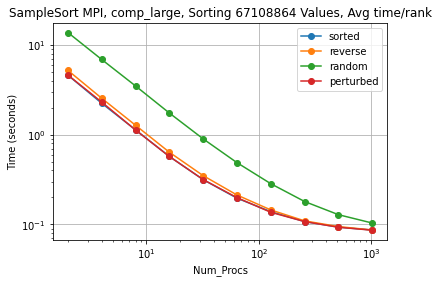

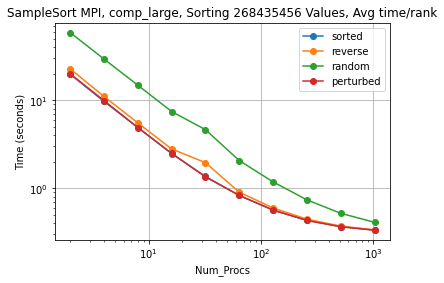

In [172]:
for name in function_names:
    for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
        masterDF = pd.DataFrame()
        for inputType in ctks.keys():
            if("strong" in inputType and "mpi" in inputType):
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                tempDF = tempDF.rename(inputType.split('_')[1])    
                masterDF = pd.concat([masterDF, tempDF], axis=1) 

        plot_pandas(
            df=masterDF,
            title="SampleSort MPI, " + str(name) + ", Sorting " + str(inputSize) + " Values, Avg time/rank",
            xlabel="Num_Procs",
            ylabel="Time (seconds)",
            loglog=True
        )

# MPI WEAK SCALING TIME PLOTS

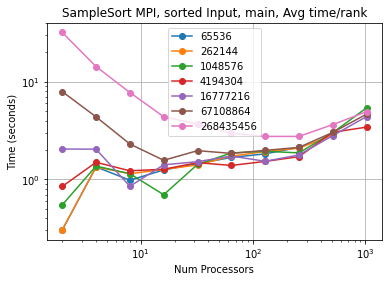

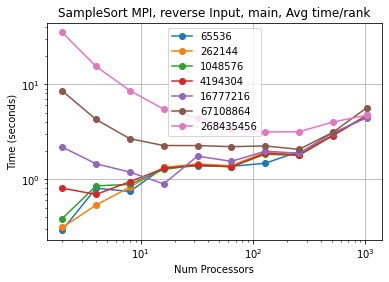

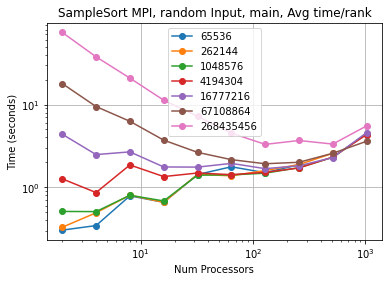

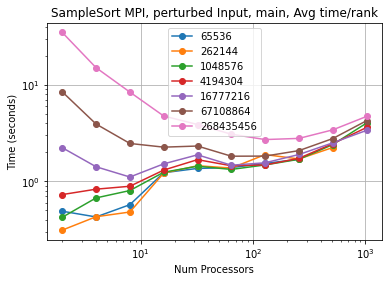

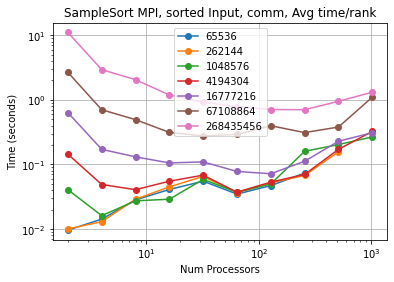

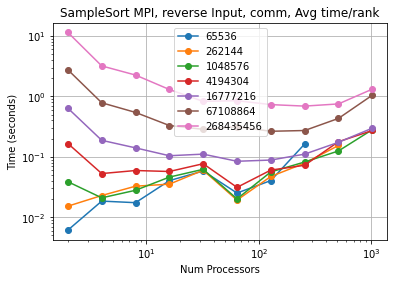

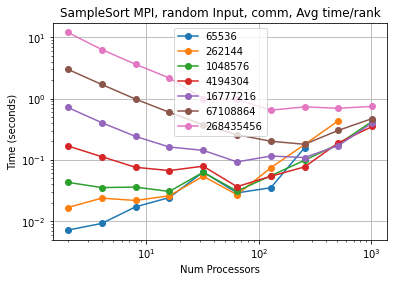

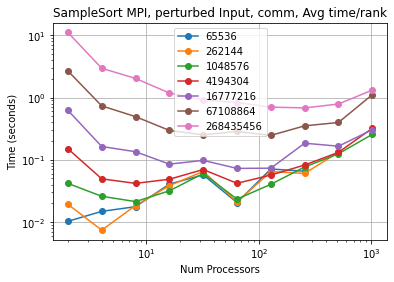

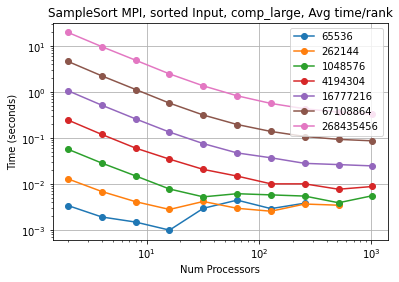

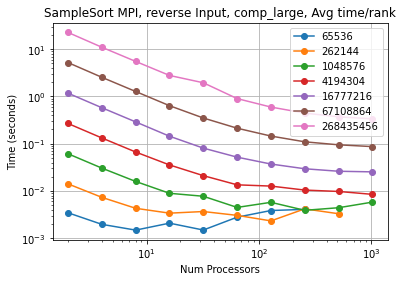

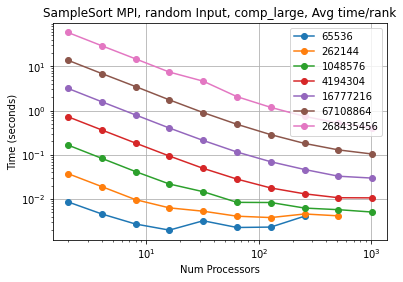

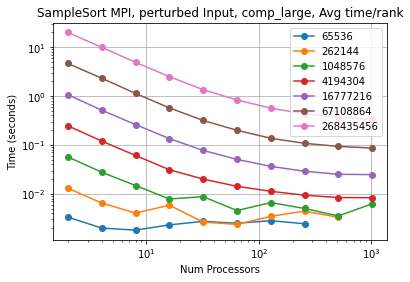

In [175]:
for name in function_names:
    for inputType in ctks.keys():
        if "weak" in inputType and "mpi" in inputType:
            masterDF = pd.DataFrame()
            for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                tempDF = tempDF.rename(inputSize)    
                masterDF = pd.concat([masterDF, tempDF], axis=1) 

            plot_pandas(
                df=masterDF,
                title="SampleSort MPI, " + str(inputType.split("_")[1]) + " Input, " + str(name) + ", Avg time/rank",
                xlabel="Num Processors",
                ylabel="Time (seconds)",
                loglog=True
            )

# CUDA STRONG SCALING TIME PLOTS

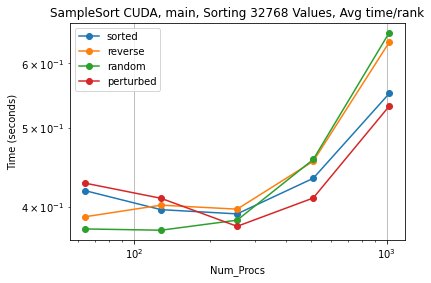

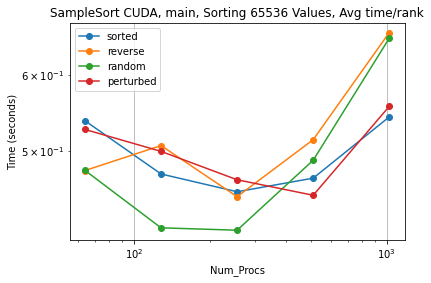

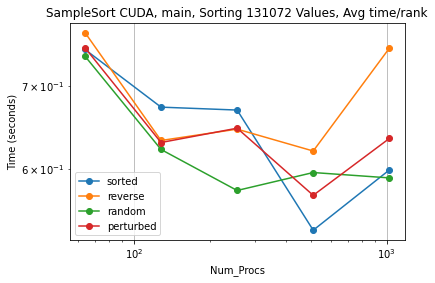

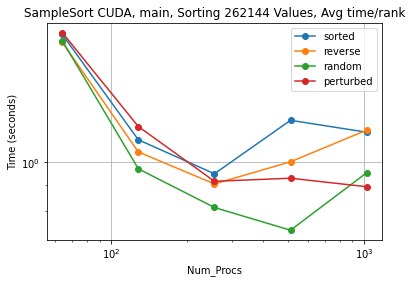

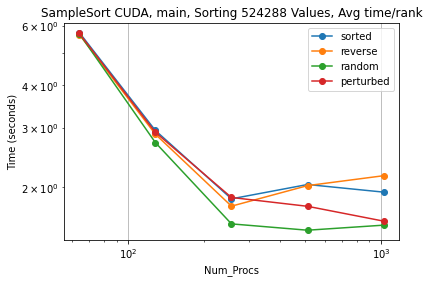

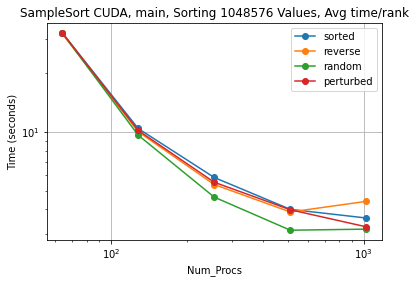

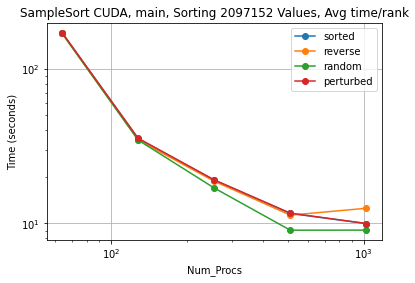

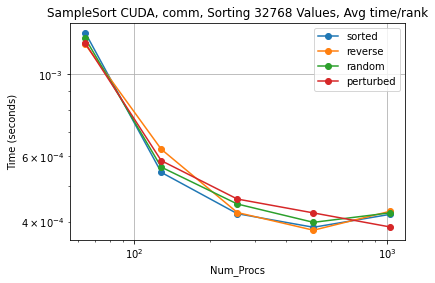

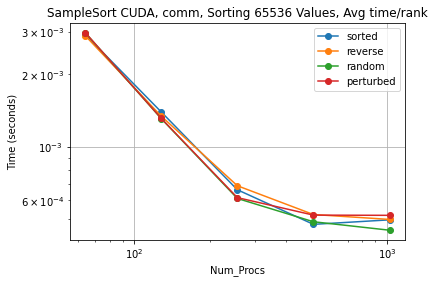

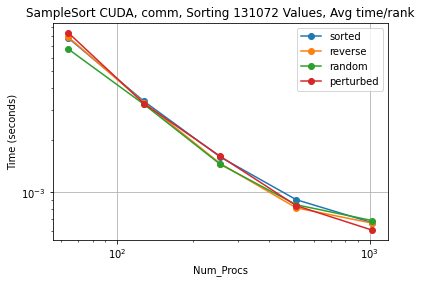

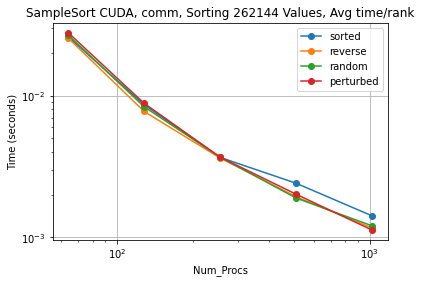

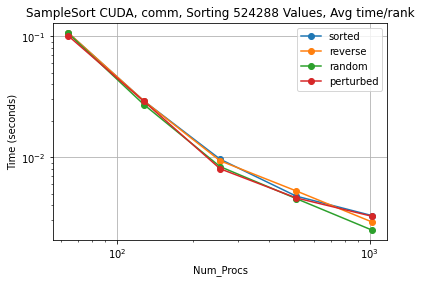

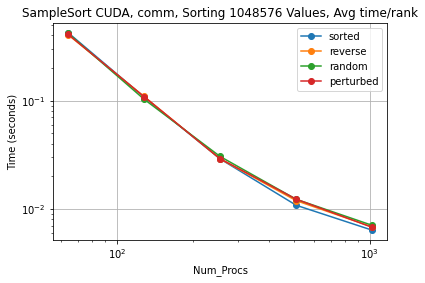

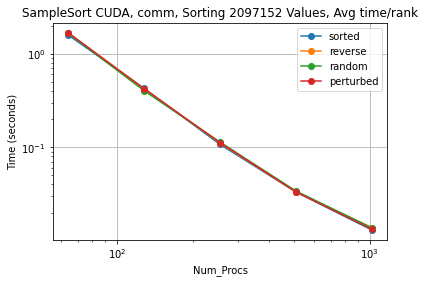

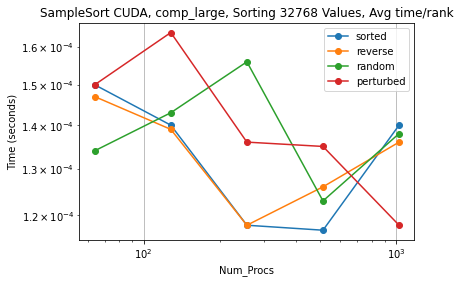

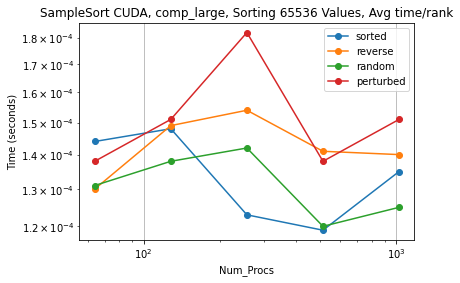

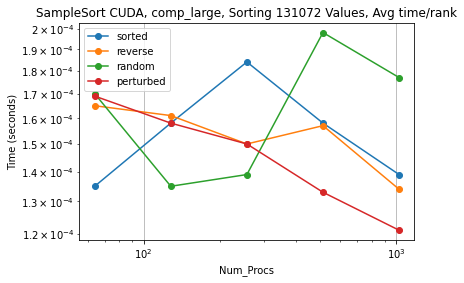

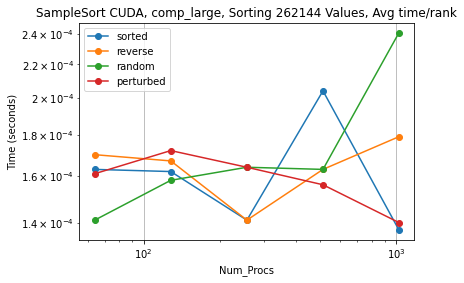

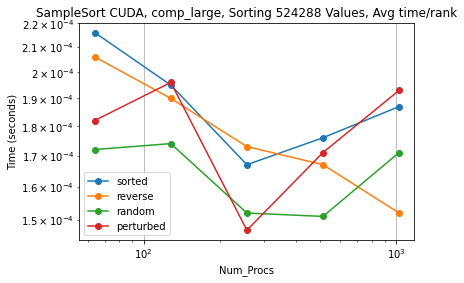

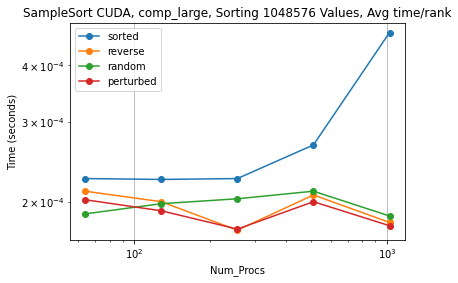

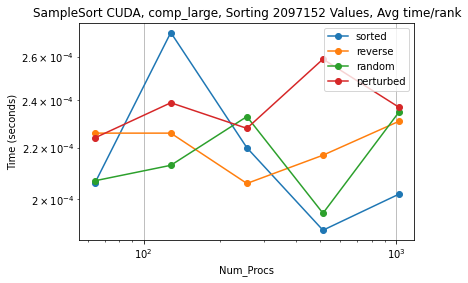

In [173]:
for name in function_names:
    for inputSize in [32768, 65536, 131072, 262144, 524288, 1048576, 2097152]:
        masterDF = pd.DataFrame()
        for inputType in ctks.keys():
            if("strong" in inputType and "cuda" in inputType):
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                tempDF = tempDF.rename(inputType.split('_')[1])    
                masterDF = pd.concat([masterDF, tempDF], axis=1) 

        plot_pandas(
            df=masterDF,
            title="SampleSort CUDA, " + str(name) + ", Sorting " + str(inputSize) + " Values, Avg time/rank",
            xlabel="Num_Procs",
            ylabel="Time (seconds)",
            loglog=True
        )

# CUDA WEAK SCALING TIME PLOTS

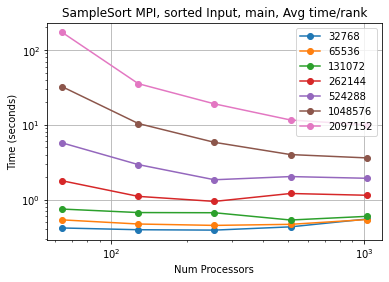

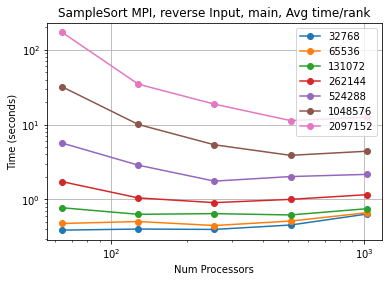

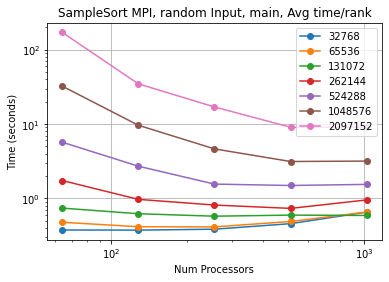

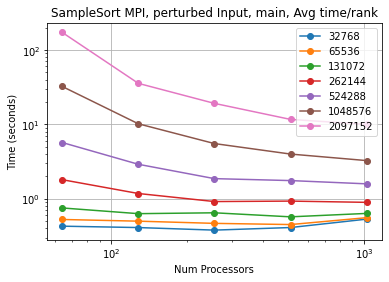

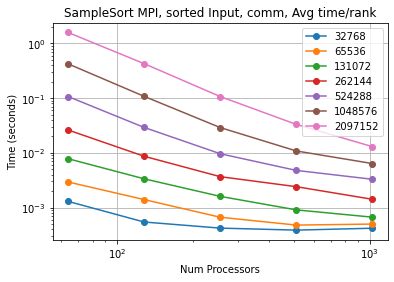

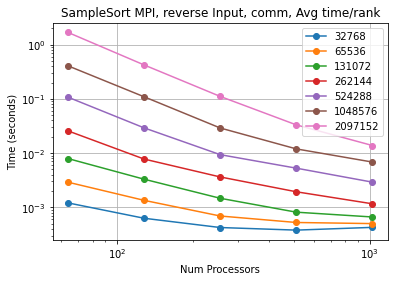

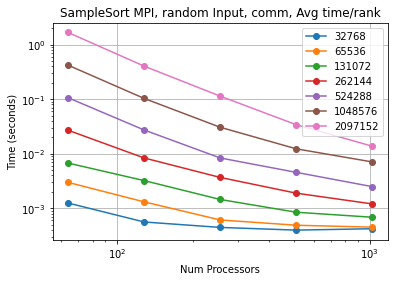

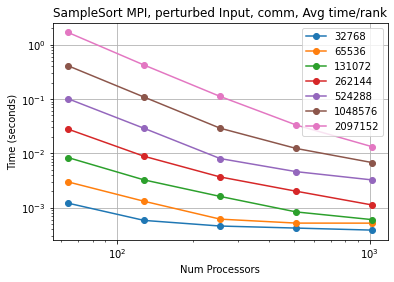

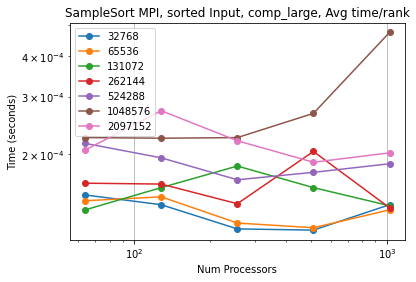

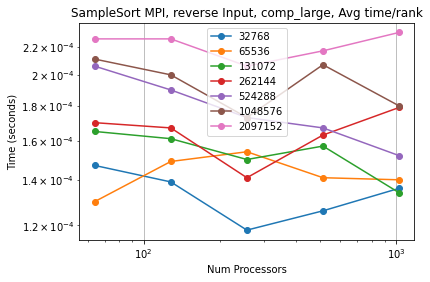

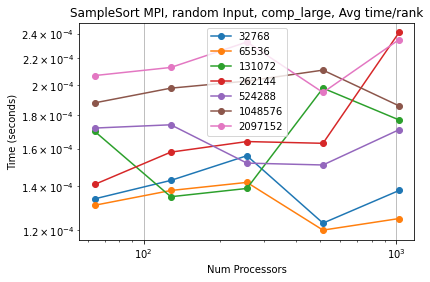

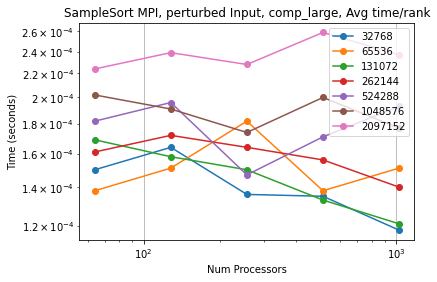

In [174]:
for name in function_names:
    for inputType in ctks.keys():
        if "weak" in inputType and "cuda" in inputType:
            masterDF = pd.DataFrame()
            for inputSize in [32768, 65536, 131072, 262144, 524288, 1048576, 2097152]:
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                tempDF = tempDF.rename(inputSize)    
                masterDF = pd.concat([masterDF, tempDF], axis=1) 

            plot_pandas(
                df=masterDF,
                title="SampleSort MPI, " + str(inputType.split("_")[1]) + " Input, " + str(name) + ", Avg time/rank",
                xlabel="Num Processors",
                ylabel="Time (seconds)",
                loglog=True
            )

## Speedup

In [118]:
ctks["mpi_strong_random"].dataframe.reset_index().drop("num_threads", axis=1).set_index("name")#/ctks["mpi_strong_random"].dataframe

<ipython-input-118-2dfb4940e57d>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ctks["mpi_strong_random"].dataframe.reset_index().drop("num_threads", axis=1).set_index("name")#/ctks["mpi_strong_random"].dataframe


1048576                                            \
                  Min time/rank Max time/rank Avg time/rank    Total time   
name                                                                        
main                   0.994806      1.007307      1.001056      2.002113   
main                   1.496862      1.531642      1.517221      6.068885   
main                   2.317955      2.412676      2.374456     18.995646   
main                   4.564660      4.783167      4.681954     74.911261   
main                  10.559323     11.096437     10.799218    345.574971   
main                  13.098525     14.552916     13.486917    863.162672   
main                  11.939993     13.020449     12.611330   1614.250236   
main                  13.989345     15.233355     14.860865   3804.381537   
main                  22.588113     23.994056     23.397431  11979.484918   
main                  29.059940     30.710559     30.113245  30835.962580   
comm                   0.141299      0.289307      0.215303      0.430606   
comm                   0.261130      0.401408      0.345486      1.381945   
comm                   0.535018      0.700082      0.585490      4.683918   
comm                   1.316133      1.488298      1.402997     22.447952   
comm                   3.746634      4.283326      4.013115    128.419689   
comm                   0.481883      1.093153      0.771897     49.401432   
comm                   1.973164      2.700251      2.389330    305.834230   
comm                   3.024473      3.962029      3.608854    923.866668   
comm                   3.917985      6.611558      6.184523   3166.475789   
comm                   5.936741     16.997963     16.080287  16466.213818   
MPI_Barrier            0.059680      0.211478      0.135579      0.271159   
MPI_Barrier            0.086934      0.278306      0.188874      0.755498   
MPI_Barrier            0.166504      0.364369      0.268861      2.150889   
MPI_Barrier            0.175248      0.575355      0.397611      6.361772   
MPI_Barrier            0.852572      1.673349      1.355170     43.365452   
MPI_Barrier            0.159804      0.564175      0.313075     20.036816   
MPI_Barrier            0.318811      0.911172      0.617389     79.025812   
MPI_Barrier            0.758112      1.652928      1.044439    267.376327   
MPI_Barrier            0.721089      1.943579      1.304361    667.832847   
MPI_Barrier            1.198768      3.273854      2.196249   2248.958990   
comm_large             0.046133      0.052818      0.049476      0.098951   
comm_large             0.057423      0.114599      0.091160      0.364638   
comm_large             0.091390      0.203008      0.142161      1.137289   
comm_large             0.422415      0.728272      0.563216      9.011452   
comm_large             1.029245      1.964558      1.312616     42.003727   
comm_large             0.029447      0.545763      0.277921     17.786951   
comm_large             0.391313      1.433043      0.911174    116.630218   
comm_large             0.364715      1.464600      1.121210    287.029881   
comm_large             0.265116      1.593528      1.177754    603.009923   
comm_large             0.413575      1.756193      0.957977    980.967944   
MPI_Alltoallv          0.021458      0.022845      0.022151      0.044302   
MPI_Alltoallv          0.040733      0.080188      0.057600      0.230402   
MPI_Alltoallv          0.046144      0.098024      0.069137      0.553099   
MPI_Alltoallv          0.284256      0.447992      0.391364      6.261822   
MPI_Alltoallv          0.576261      0.963990      0.822325     26.314392   
MPI_Alltoallv          0.021828      0.150366      0.091048      5.827095   
MPI_Alltoallv          0.157253      0.469070      0.324145     41.490624   
MPI_Alltoallv          0.165406      0.706696      0.560957    143.604878   
MPI_Alltoallv          0.265046      0.758226      0.598398    306.379964   
MPI_Alltoallv       

In [111]:
speedup_df = ctks["mpi_strong_random"].dataframe #.loc[(slice(None),1), :].reset_index().drop("threads", axis=1).set_index("name")/ctk.dataframe


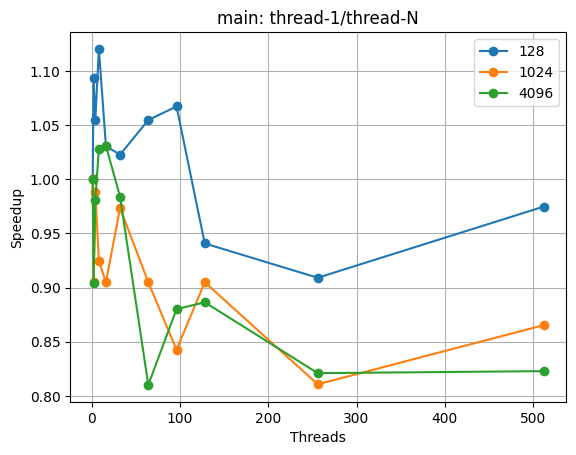

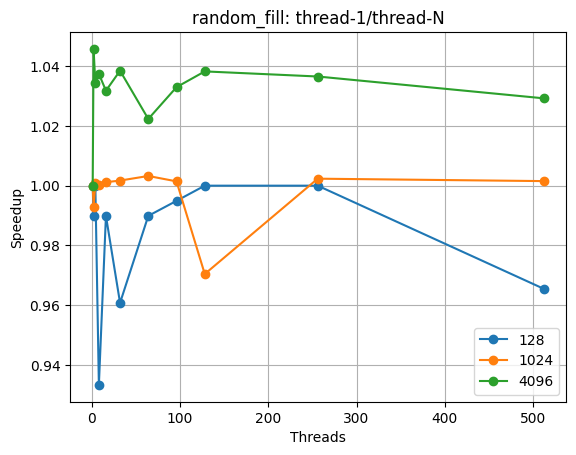

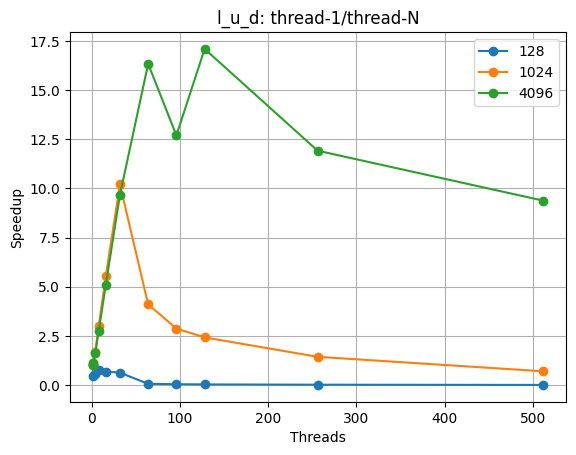

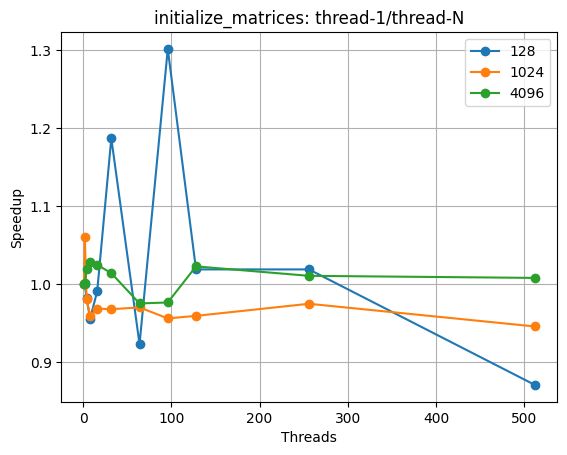

In [16]:
speedup_df = ctk.dataframe.loc[(slice(None),1), :].reset_index().drop("threads", axis=1).set_index("name")/ctk.dataframe

for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )